### Question 6  Function Design - Line Chart

Consider a fictional social media coorpoeration named Owly. In Owly, users are able to post "Chirps" which are short text only messages. Other users are able to like and "rechip" other user's Chirps. Rechipping means taking another Chirp and adding it to their own list of Chirps.

Given the following data definitions and functions, design a function that takes in a list of ChirpEngagements and a chirp id and displays a line chart of the total chirp engagements (number of rechirps + number of likes) over the days since the chirp was posted for the given chirp id. 

**Note that for a given Chirp, there can be multiple ChirpEngagements for a single day.** For example, if we want to find the all the number of likes for a given day, we must sum up all the likes inside all ChirpEngagements of that day

hint: sort_and_combine_duplicates is useful

In [14]:
from cs103 import *
from typing import List, NamedTuple
from matplotlib import pyplot

Chirp = NamedTuple('Chirp', [('chirp_id', str),
                             ('chirp_text', str)])
# interp. a social media message with its id and text

C1 = Chirp('1327929996502193803', 'UBC extends Winter Break!')
C2 = Chirp('1227777797869645824', 'Snow expected in Vancouver.')

# template rules used: compound
def fn_for_chirp(c: Chirp) -> ...:
    return ...(chirp_id,
               chirp_text)


ChirpEngagement = NamedTuple('ChirpEngagement', [('chirp', Chirp),
                                                 ('days_after_chirp', int),
                                                 ('num_rechirps', int),
                                                 ('num_likes', int)])
# interp. daily engagement via rechirps and likes with a chirp. days_after_chirp is the number of days
#         since the chirp was posted online

CE0 = ChirpEngagement(C1, 0, 5, 123)
CE1 = ChirpEngagement(C1, 1, 9, 98)
CE2 = ChirpEngagement(C1, 2, 2, 93)
CE3 = ChirpEngagement(C1, 3, 4, 54)
CE4 = ChirpEngagement(C1, 4, 2, 23)
CE5 = ChirpEngagement(C1, 5, 1, 9)
CE6 = ChirpEngagement(C2, 5, 1, 9)

# tempate rules used: compound and the reference rule
def fn_for_chirp_engagement(ce: ChirpEngagement) -> ...:
    return ...(fn_for_chirp(ce.chirp),
               days_after_chirp,
               num_rechirps,
               num_likes)


# List[ChirpEngagment]
# interp. a list of chirp engagements

LOCE0 = []
LOCE1 = [CE0, CE1, CE2, CE3, CE4, CE5]
LOCE2 = [CE0, CE1, CE2, CE3, CE4, CE6]

# template rules used: arbitrary-sized and the reference rule
def fn_for_loce(loce: List[ChirpEngagement]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for ce in loce:
        acc = ...(acc, fn_for_chirp_engagement(ce))
    return ...(acc)



@typecheck
def sort_and_combine_duplicates(loce: List[ChirpEngagement]) -> List[ChirpEngagement]:
    """
    combines engagement numbers for duplicate days in loce then sorts by days after chirp
    and returns the result
    
    ASSUME: all elements from loce contain the same Chirp
    """
    
    acc = []
    for ce in loce:
        if has_day(acc, ce):
            acc = combine_days(acc, ce)
        else:
            acc.append(ce)
            
    sorted_list = sorted(acc, key=get_days)
    return sorted_list

@typecheck
def combine_days(loce: List[ChirpEngagement], ce: ChirpEngagement) -> List[ChirpEngagement]:
    """
    return a list of chirp engagements that combines all chirps that match chirp_id with ce
    """
    acc = []
    for ce1 in loce:
        if ce1.days_after_chirp == ce.days_after_chirp:
            acc.append(ChirpEngagement(ce1.chirp, 
                                       ce1.days_after_chirp, 
                                       ce1.num_rechirps + ce.num_rechirps, 
                                       ce1.num_likes + ce.num_likes))
        else:
            acc.append(ce1)
    return acc

@typecheck
def has_day(loce: List[ChirpEngagement], ce: ChirpEngagement) -> bool:
    for ce1 in loce:
        if ce1.days_after_chirp == ce.days_after_chirp:
            return True
    return False

@typecheck
def get_days(ce: ChirpEngagement) -> int:
    return ce.days_after_chirp

start_testing()

expect(sort_and_combine_duplicates([]), [])
expect(sort_and_combine_duplicates([CE2, CE1]), [CE1, CE2])
expect(sort_and_combine_duplicates([CE5, CE3, CE1, CE2]), [CE1, CE2, CE3, CE5])
expect(sort_and_combine_duplicates([ChirpEngagement(C1, 5, 2, 4), ChirpEngagement(C1, 5, 1, 7)]),
      [ChirpEngagement(C1, 5, 3, 11)])
expect(sort_and_combine_duplicates([ChirpEngagement(C1, 5, 5, 11), 
                                    ChirpEngagement(C1, 5, 2, 4), 
                                    ChirpEngagement(C1, 5, 1, 7)]),
      [ChirpEngagement(C1, 5, 8, 22)])
expect(sort_and_combine_duplicates([ChirpEngagement(C1, 5, 5, 11), 
                                    ChirpEngagement(C1, 3, 6, 12), 
                                    ChirpEngagement(C1, 5, 1, 7)]),
      [ChirpEngagement(C1, 3, 6, 12), ChirpEngagement(C1, 5, 6, 18)])


expect(has_day(LOCE1, ChirpEngagement(C1, 5, 1, 7)), True)
expect(has_day(LOCE1, ChirpEngagement(C1, 9, 1, 7)), False)

expect(combine_days([CE5], ChirpEngagement(C1, 5, 1, 7)), [ChirpEngagement(C1, 5, 2, 16)])
expect(combine_days(LOCE1, ChirpEngagement(C1, 5, 1, 7)), [CE0, CE1, CE2, CE3, CE4, ChirpEngagement(C1, 5, 2, 16)])

summary()


10 of 10 tests passed


7 of 7 tests passed


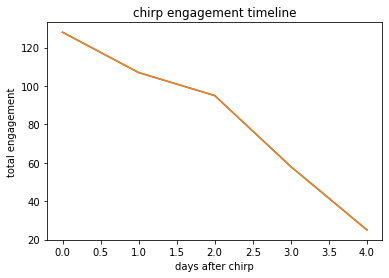

In [15]:
@typecheck
def plot_chirp_engagement_timeline(loce: List[ChirpEngagement], chirp_id: str) -> None:
    """
    displays a line chart which shows the daily chirp engagement (likes+rechirps) for a given chirp id and loce
    (y-axis: chirp engagements, x_axis: days after chirp)
    """
    # return None #stub
    # template from visualization
    
    engagements_with_matching_id = filter_by_id(loce, chirp_id)
    sorted_and_combined_engagements = sort_and_combine_duplicates(engagements_with_matching_id)
    
    x_data = get_days2(sorted_and_combined_engagements)
    y_data = get_total_engagements(sorted_and_combined_engagements)
    
    
    pyplot.xlabel("days after chirp") # sets the label for the x-axis 
    pyplot.ylabel("total engagement") # sets the label for the y-axis 
    pyplot.title("chirp engagement timeline") # sets the plot’s title
    pyplot.plot(x_data, y_data) # plots the given data 
    
@typecheck
def filter_by_id(loce: List[ChirpEngagement], chirp_id: str) -> List[ChirpEngagement]:
    """
    returns a list of chirp engagements with the given chirp id from loce
    """
    # return [] # stub
    # template from List[ChirpEngagement] with additional parameter
    acc = [] # type: List[ChirpEngagement]
    for ce in loce:
        if is_chirp_engagement_matching_id(ce, chirp_id):
            acc.append(ce)
    return acc

@typecheck
def is_chirp_engagement_matching_id(ce: ChirpEngagement, chirp_id: str) -> bool:
    """
    returns true if c has a Chirp with the given chirp_id
    """
    #return True # stub
    # template based on ChirpEngagement with additional parameter
    return is_chirp_matching_id(ce.chirp, chirp_id)

@typecheck
def is_chirp_matching_id(c: Chirp, chirp_id: str) -> bool:
    """
    return true if c has the same id as chirp_id
    """
    # return True # stub
    # template based on Chirp with addiational parameter
    return c.chirp_id == chirp_id

@typecheck
def get_days2(loce: List[ChirpEngagement]) -> List[int]:
    """
    gets a list of days after chirp from loce
    """
    # return [] #stub
    # template based on List[ChirpEngagement]
    acc = [] # type: List[int]
    for ce in loce:
        acc.append(ce.days_after_chirp)
    return acc

    
@typecheck
def get_total_engagements(loce: List[ChirpEngagement]) -> List[int]:
    """
    returns a list containing the total engagements (likes + rechirps) of all ChirpEngagements inside loce
    """
    #return [] # stub
    acc = [] # type: List[int]
    for ce in loce:
        acc.append(add_chirp_engagements(ce))
    return acc


@typecheck
def add_chirp_engagements(ce: ChirpEngagement) -> int:
    """
    returns the total enagement for a single chirp (likes + rechirps)
    """
    # return 0 # stub
    #template based off ChirpEngagement
    return ce.num_rechirps + ce.num_likes
    
    

start_testing()
expect(plot_chirp_engagement_timeline(LOCE2, '1327929996502193803'), None)

expect(filter_by_id(LOCE2,'1227777797869645824'), [CE6])
expect(is_chirp_engagement_matching_id(CE6, '1227777797869645824'), True)

expect(is_chirp_matching_id(C2, '1227777797869645824'), True)

expect(get_days2(LOCE1), [0,1,2,3,4,5])

expect(get_total_engagements(LOCE1), [128, 107, 95, 58, 25, 10])

expect(add_chirp_engagements(CE1), 107)

summary()

plot_chirp_engagement_timeline(LOCE2, '1327929996502193803')

### Question 7 Function Design - More Rechirps

Design a function that takes in a list of Chirp Engagements and calculates the percentage of Chirp Engagements that have more rechirps than likes